**This report aims at applying descriptive statistics and Machine learning techniques to find trends in Churn data**

**Meaning of Churn** -Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.

**What I have implemented:**

 1. Found best correlations
 2. Trained and tested the classifier which can predict parameter "Exited"("Exited" shows if the customer will leave you or not)

In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import svm 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.naive_bayes import GaussianNB

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataframe = pd.read_csv("../input/Churn_Modelling.csv")
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# The value "14" displayes the number of columns
dataframe.shape

(10000, 14)

In [4]:
#You may have noticed that we have got some string fields in dataset
#In order to make to predictions we should convert this fields to integer
#But first lets see the unique values of theese fields
print("Geo unique values",dataframe['Geography'].unique())
print("Gender unique values",dataframe['Gender'].unique())

Geo unique values ['France' 'Spain' 'Germany']
Gender unique values ['Female' 'Male']


In [5]:
#Field convertation
dataframe['Geography'].replace("France",1,inplace= True)
dataframe['Geography'].replace("Spain",2,inplace = True)
dataframe['Geography'].replace("Germany",3,inplace=True)
dataframe['Gender'].replace("Female",0,inplace = True)
dataframe['Gender'].replace("Male",1,inplace=True)

In [6]:
#Now check if everything was transformed correctly
print("Geo unique values",dataframe['Geography'].unique())
print("Gender unique values",dataframe['Gender'].unique())

Geo unique values [1 2 3]
Gender unique values [0 1]


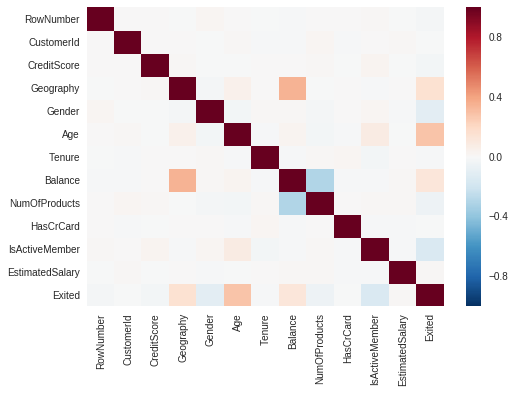

In [7]:
#In order to understand what "X" best contributes to "Y" result we should use correlation matrix
import seaborn as sns
corr = dataframe.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.show()

In [8]:
X1 = dataframe['Balance'] 
X2 = dataframe['Age']
X3 = dataframe['Geography']
Y = dataframe['Exited']
X = dataframe[['Balance','Age','Geography']]
#See how range of X looks like 
X.head()

,Balance,Age,Geography
0,0.00,42,1
1,83807.86,41,2
2,159660.80,42,1
3,0.00,39,1
4,125510.82,43,2


In [9]:
#Lets count the top 3 positive correlation parametrs
#The values are:(0.11853277,0.15377058,0.28532304)
print ('Balance and Exited',np.corrcoef(X1,Y),'\n')
print ('Age and Exited',np.corrcoef(X2,Y),'\n')
print ('Geography and Exited',np.corrcoef(X3,Y),'\n')

Balance and Exited [[ 1.          0.11853277]
 [ 0.11853277  1.        ]] 

Age and Exited [[ 1.          0.28532304]
 [ 0.28532304  1.        ]] 

Geography and Exited [[ 1.          0.15377058]
 [ 0.15377058  1.        ]] 



In [10]:
#Lets split the data
# I prefer to use train_test_split for cross-validation
# This peace will prove us if we have overfitting 
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.4, random_state=0)

In [11]:
#Now train and find out the prediction rate 
clf = GaussianNB()
clf = clf.fit(X_train ,y_train)
clf.score(X_test, y_test)

0.77700000000000002

**Lets make some visualisations**


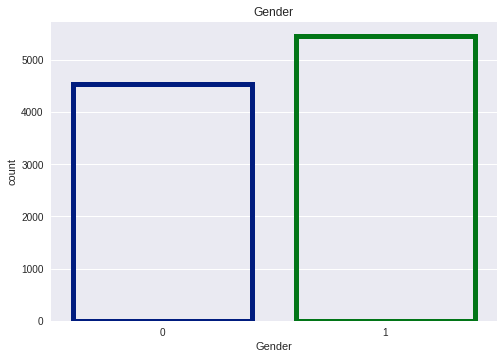

In [12]:
#Male:1,Female:0
ax = sns.countplot(x="Gender", data=dataframe,
                   
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                  edgecolor=sns.color_palette("dark", 3))
ax.set_title('Gender')
plt.show()

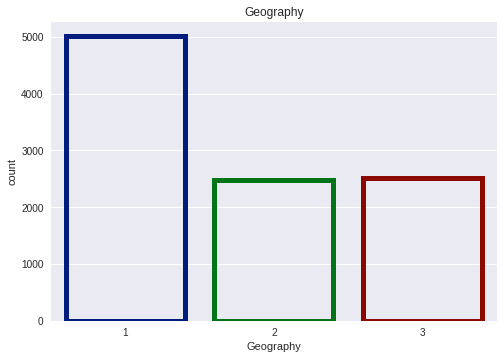

In [13]:
#France:1,Spain:2,Germany:3
ax = sns.countplot(x="Geography", data=dataframe,
                   
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                  edgecolor=sns.color_palette("dark", 3))
ax.set_title('Geography')
plt.show()

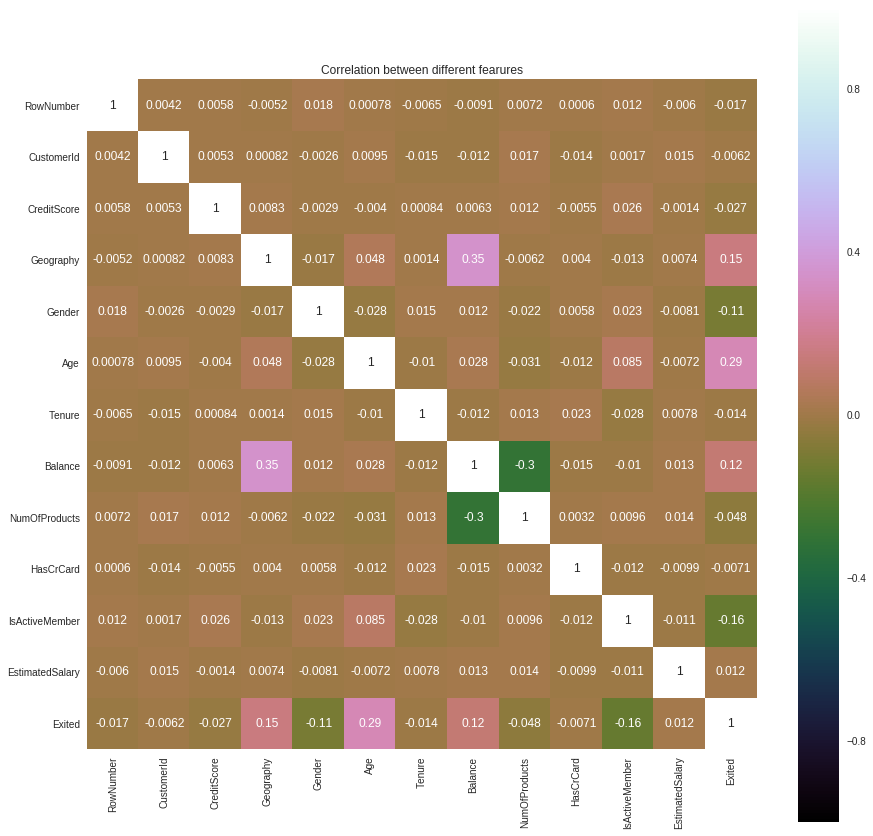

In [14]:
#Another type of correlation matrix 
correlation = dataframe.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')
plt.show()

**I tested some other models in Matlab and found out that "Boost trees" is the best possible solution**

In [15]:
#Using ensemble baggin tree classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)

bagging = bagging.fit(X_train ,y_train)
bagging.score(X_test, y_test)

0.79874999999999996

**Lets try Random Forest:**
I tested some "n_estimators" and max_features parameters and the variant of Random Forest below show the best result.

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=70,max_features = 3,max_depth=5,n_jobs=-1)
rf.fit(X_train ,y_train)
rf.score(X_test, y_test)

0.81425000000000003